In this Data Project we will be looking at data from the 2012 election.

The first data set will be the results of political polls. We will analyze this aggregated poll data and answer some questions:

    1.) Who was being polled and what was their party affiliation?
    2.) Did the poll results favor Romney or Obama?
    3.) How do undecided voters effect the poll?
    4.) Can we account for the undecided voters?
    5.) How did voter sentiment change over time?
    6.) Can we see an effect in the polls from the debates?

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from __future__ import division

In [3]:
df = pd.read_csv("http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [4]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


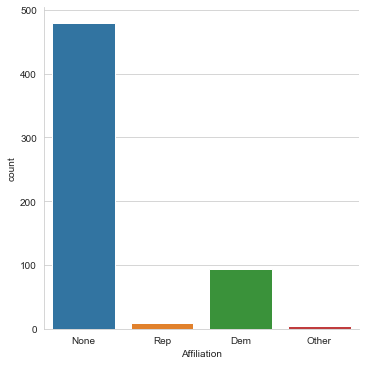

In [5]:
sns.catplot(x='Affiliation', data=df, kind='count')

We can see most of the polls were neutral which is good. Less than 100 polls were run by Democrates which we have to have in mind.

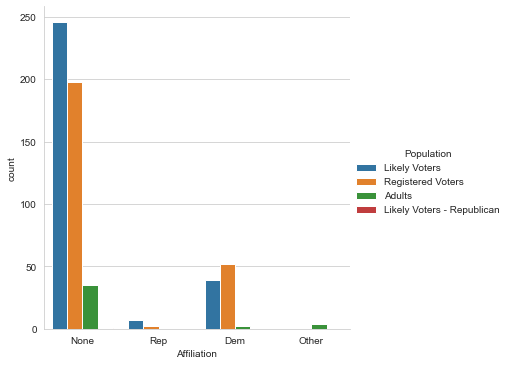

In [6]:
sns.catplot(x='Affiliation', data=df, hue='Population', kind='count')

We can see that the data gathered from likely voters and registered voters. So hopefuly these polls were a good reflection of the reality.

<AxesSubplot:>

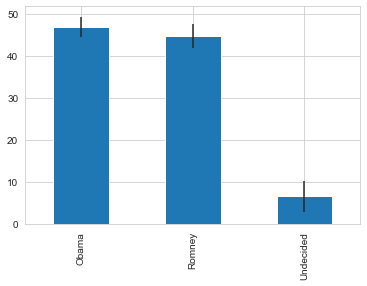

In [7]:
avg = {"Average" : [df["Obama"].mean(), df["Romney"].mean(), df["Undecided"].mean()]}
avg_df =pd.DataFrame(avg , index=["Obama", "Romney", "Undecided"] )
std = [df["Obama"].std() , df["Romney"].std() , df["Undecided"].std()]
avg_df.plot(yerr=std ,kind='bar', legend = False)

The votes for Obama and Romney are really close considering their error bars, so it looks like that the undecided votes are going to decide for the final result. So let's go deeper into the undecided votes:

In [8]:
std_df=pd.DataFrame(std , index=["Obama", "Romney", "Undecided"], columns = ["STD"] )
poll_avg = pd.concat([avg_df,std_df],axis=1)
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


In [9]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


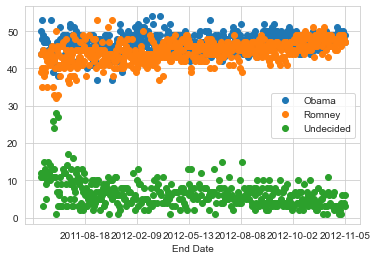

In [10]:
figure = df.plot(x="End Date", y=["Obama", "Romney", "Undecided"], linestyle='', marker="o")
figure.invert_xaxis()

As you can see, the closer we got to the election, the amount of undecided votes reduced and the amount of Romney and Obama's votes got closer to each other.

In [11]:
df['Difference'] = (df['Obama'] - df['Romney'])/100

In [12]:
group1 = df.groupby(["Start Date"], as_index=False).mean()
group1

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.000000,44.00,44.00,12.000000,NaN,NaN,1,0.0000
1,2009-04-17,686.000000,50.00,39.00,11.000000,NaN,NaN,1,0.1100
2,2009-05-14,1000.000000,53.00,35.00,12.000000,NaN,NaN,1,0.1800
3,2009-06-12,638.000000,48.00,40.00,12.000000,NaN,NaN,1,0.0800
4,2009-07-15,577.000000,49.00,40.00,11.000000,NaN,NaN,1,0.0900
...,...,...,...,...,...,...,...,...,...
352,2012-10-31,10420.250000,48.00,46.50,4.000000,2.0,NaN,1,0.0150
353,2012-11-01,1989.000000,49.00,47.25,2.400000,1.5,NaN,1,0.0175
354,2012-11-02,1041.750000,49.25,48.50,2.000000,1.0,NaN,1,0.0075
355,2012-11-03,1310.833333,48.50,48.00,4.333333,1.0,NaN,1,0.0050


<AxesSubplot:xlabel='Start Date'>

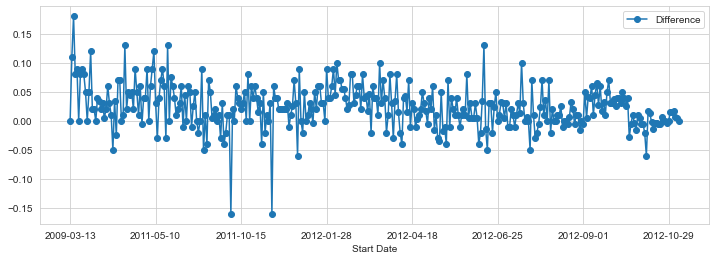

In [13]:
group1.plot(x="Start Date", y="Difference", marker='o',linestyle='-', figsize=(12,4))


The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In [14]:
row_in = 0
xlimit = []

for date in group1['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in += 1

print(min(xlimit),',', max(xlimit))

325 , 352


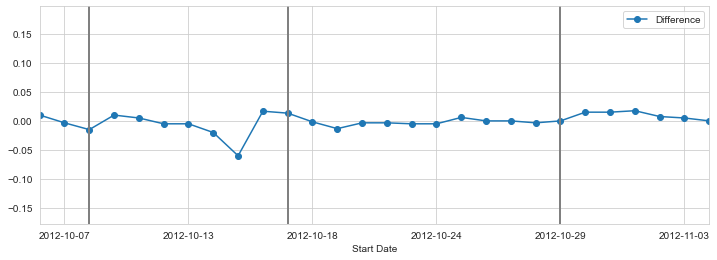

In [15]:
group1.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',xlim=(329,356))
plt.axvline(x=329+2, linewidth=2, color='grey')
plt.axvline(x=329+10, linewidth=2, color='grey')
plt.axvline(x=329+21, linewidth=2, color='grey')


Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though he performed much worse against Romney during the first debate.

#Donor Data Set

Let's look at a data set consisting of information on donations to the federal campaign. 

The questions we will be trying to answer are:

    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?
    

In [16]:
df = pd.read_csv('C:/Users/Sahar/Udemy Projects/election-analysis/Election_Donor_Data.csv')
df.head()

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [18]:
df["contb_receipt_amt"].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

It looks like the most commen amount of donaion were 100, 50 and 25.

In [19]:
mean = df["contb_receipt_amt"].mean()
std = df["contb_receipt_amt"].std()
print("average =", "{:.2f}".format(mean), ", std =", "{:.2f}".format(std))

average = 298.24 , std = 3749.67


That is a huge STD indeed. Let's see what causes this huge amount:

In [20]:
top_donor = df['contb_receipt_amt'].copy()
top_donor.sort_values(ascending=True)

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 1001731, dtype: float64

We see there are a lot of negative values which are the refunds in the dataset. But we dont want them:

In [21]:
top_donor = top_donor[top_donor >0]
top_donor.sort_values(ascending=True)

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
             ...    
319478     526246.17
344419    1511192.17
344539    1679114.65
326651    1944042.43
325136    2014490.51
Name: contb_receipt_amt, Length: 991475, dtype: float64

Here we can see that the top 10 most common donations ranged from 10 to 2500 dollars. Are the donations usually made in round number amounts? (e.g. 10,20,50,100,500 etc.)

<AxesSubplot:>

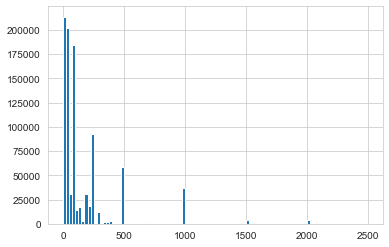

In [22]:
common_don = top_donor[top_donor < 2500]
common_don.hist(bins=100)

Looks like our intuition was right, since we spikes at the round numbers. Let's dive deeper into the data and see if we can seperate donations by Party. Let's see the name of donors first:

In [25]:
df['cand_nm'].unique()

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

We can see that only Obama is from the democrate party while others are all republican. Let's go ahead and seperate Obama from the Republican Candidates:

In [35]:
def RD (candidate):
    if candidate == "Obama, Barack":
        return "Democrate"
    else:
        return "Republican"

df["Party"] = df["cand_nm"].apply(RD)

In [37]:
df = df [df["contb_receipt_amt"] > 0]

In [51]:
df.groupby("cand_nm")["contb_receipt_amt"].count().sort_values(ascending = False)

cand_nm
Obama, Barack                     589127
Paul, Ron                         143161
Romney, Mitt                      105155
Gingrich, Newt                     46883
Santorum, Rick                     46245
Cain, Herman                       20052
Bachmann, Michelle                 13082
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Huntsman, Jon                       4066
Pawlenty, Timothy                   3844
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Name: contb_receipt_amt, dtype: int64

Clearly Obama is the front-runner in number of people donating, which makes sense, since he is not competeing with any other democratic nominees. Let's take a look at the total dollar amounts.

<AxesSubplot:xlabel='cand_nm'>

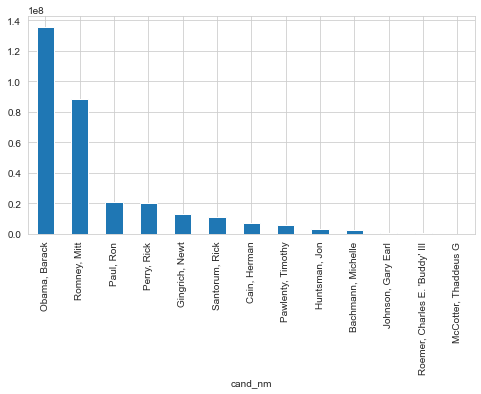

In [62]:
dollar = df.groupby('cand_nm')['contb_receipt_amt'].sum().sort_values(ascending = False)
dollar.plot(kind="bar", figsize=(8,4))

<AxesSubplot:xlabel='Party'>

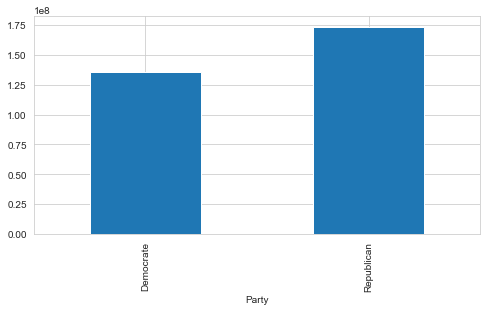

In [65]:
party = df.groupby('Party')['contb_receipt_amt'].sum()
party.plot(kind="bar", figsize=(8,4))

Looks like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.
Finally to start closing out the project, let's look at donations and who they came from (as far as occupation is concerned).

In [70]:
occupation_df = df.pivot_table('contb_receipt_amt',
                                index='contbr_occupation',
                                columns='Party', aggfunc='sum')
occupation_df

Party,Democrate,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


<AxesSubplot:ylabel='contbr_occupation'>

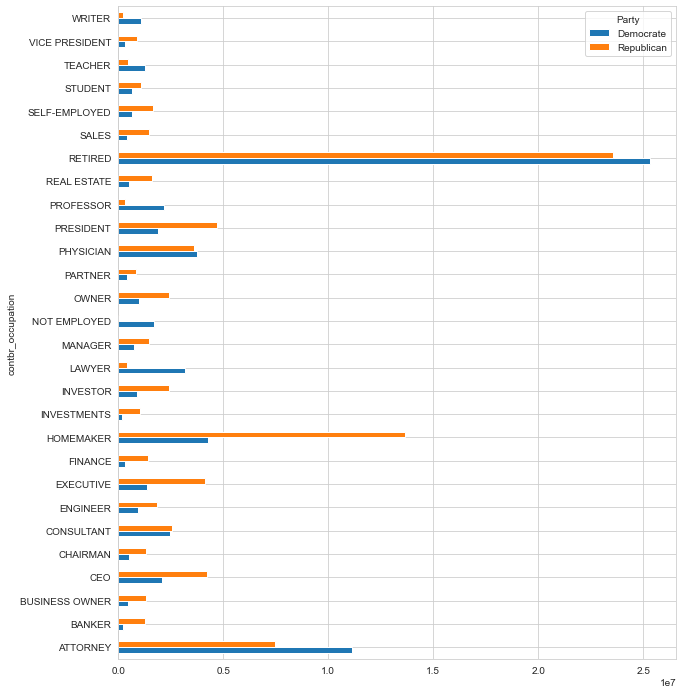

In [79]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]
occupation_df.plot(kind='barh', figsize=(10,12))